## Importing Packages

In [1]:
import fastf1
import fastf1.plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fastf1.plotting.setup_mpl()

## Loading Session Data

In [3]:
year = 2022
race = "British Grand Prix"

session = fastf1.get_session(year, race, 'R')
session.load()

core           INFO 	Loading data for British Grand Prix - Race [v3.7.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No ca

## Loading and Preparing Lap Data

In [4]:
laps = session.laps
laps = laps.sort_values(['Driver', 'LapNumber'])
laps['LapTimeSeconds'] = laps['LapTime'].dt.total_seconds()
laps.head()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,LapTimeSeconds
390,0 days 01:04:38.350000,ALB,23,NaT,1.0,1.0,NaT,NaT,NaT,NaT,...,Williams,0 days 01:02:16.093000,2022-07-03 14:03:16.105,125,NaN,False,,True,False,NaN
130,0 days 01:04:47.321000,ALO,14,0 days 00:02:30.972000,1.0,1.0,NaT,0 days 01:04:41.372000,NaT,0 days 00:01:01.539000,...,Alpine,0 days 01:02:16.093000,2022-07-03 14:03:16.105,125,5.0,False,,False,False,150.972
131,0 days 01:58:11.411000,ALO,14,NaT,2.0,2.0,0 days 01:55:37.123000,NaT,NaT,0 days 00:01:05.677000,...,Alpine,0 days 01:55:00.091000,2022-07-03 14:56:00.103,1,7.0,False,,False,False,NaN
132,0 days 02:00:28.648000,ALO,14,0 days 00:02:17.237000,3.0,2.0,NaT,NaT,0 days 00:01:09.298000,0 days 00:00:40.920000,...,Alpine,0 days 01:58:11.411000,2022-07-03 14:59:11.423,1,8.0,False,,False,True,137.237
133,0 days 02:02:05.074000,ALO,14,0 days 00:01:36.426000,4.0,2.0,NaT,NaT,0 days 00:00:30.515000,0 days 00:00:39.468000,...,Alpine,0 days 02:00:28.648000,2022-07-03 15:01:28.660,1,8.0,False,,False,True,96.426


## Compound color map

In [9]:
COMPOUND_COLORS = {
    'SOFT': '#FF3333',
    'MEDIUM': '#FFD700',
    'HARD': "#C6BFBF",
    'INTERMEDIATE': '#39B54A',
    'WET': '#0077FF'
}

## Race Statergy Comparison between different drivers

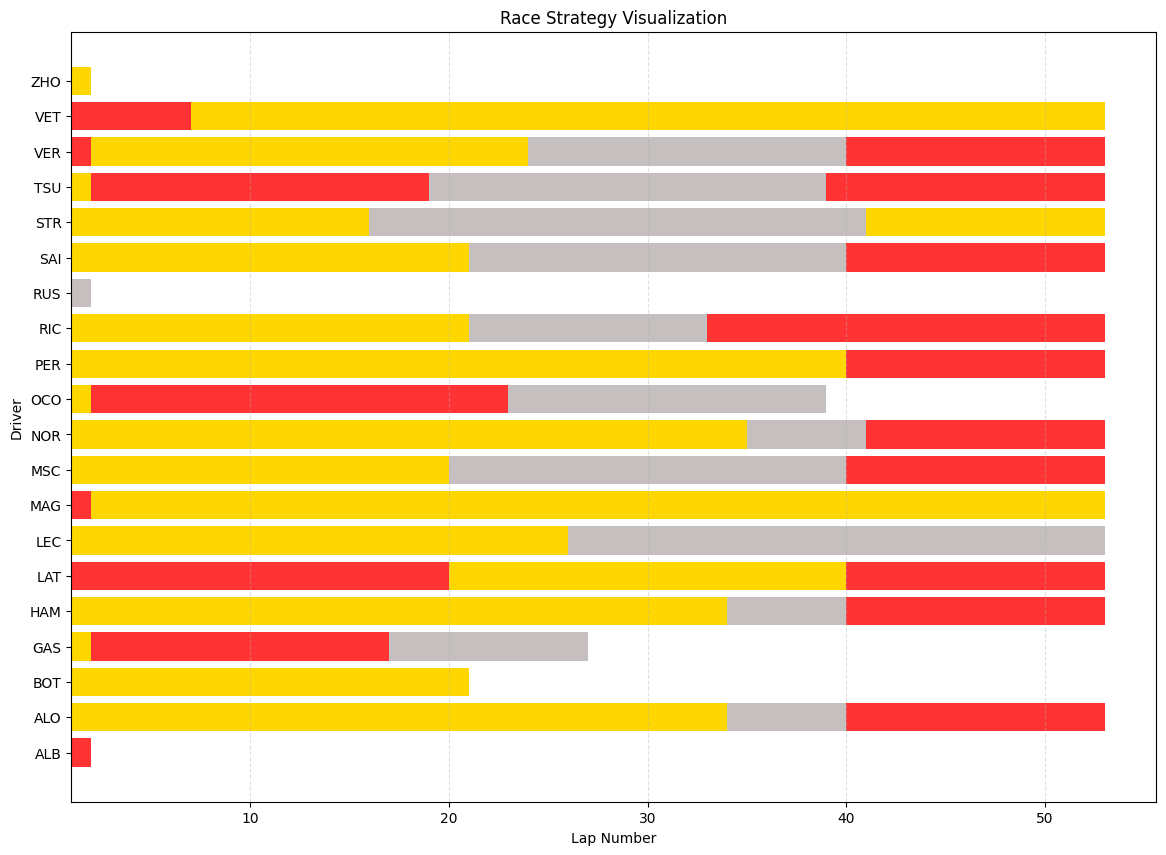

In [10]:
drivers = laps['Driver'].unique()

fig, ax = plt.subplots(figsize=(14,10))

for driver in drivers:
    stints = laps[laps['Driver'] == driver].groupby('Stint')
    
    for stint, data in stints:
        compound = data['Compound'].iloc[0]
        ax.barh(
            driver,
            len(data),
            left=data['LapNumber'].min(),
            color=COMPOUND_COLORS.get(compound, '#AAAAAA')
        )

ax.set_xlabel("Lap Number")
ax.set_ylabel("Driver")
ax.set_title("Race Strategy Visualization")
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.show()
